<a href="https://colab.research.google.com/github/Alazar10/Projects-/blob/main/Functional_API(Malaria_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf ### Models
import matplotlib.pyplot as plt ### Plotting Bar Chart
import numpy as np ### Maths Computations
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt

In [4]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteVVHNC8/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [5]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):

    DATA_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO * DATA_SIZE))


    val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATA_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATA_SIZE))


    test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATA_SIZE))

    return train_dataset, val_dataset, test_dataset

In [6]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

#dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = split(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()))


[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

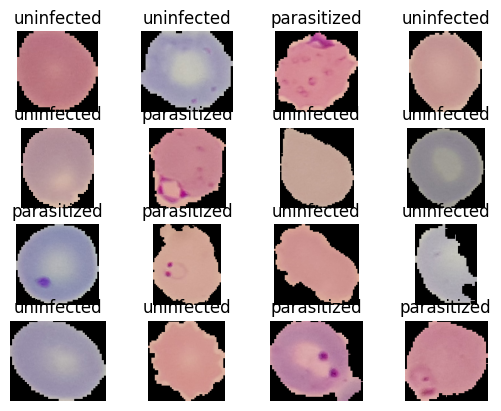

In [7]:
for i, (image, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis('off')

In [8]:
dataset_info.features['label'].int2str(1)

'uninfected'

In [9]:
IM_SIZE = 224
def resize_rescale(image, label):
    return tf.image.resize(image,(IM_SIZE, IM_SIZE))/255.0, label

In [10]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [11]:
for image,label in train_dataset.take(1):
    print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [13]:
val_dataset =  val_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [14]:
Model1 = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE,IM_SIZE,3)),

    Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid')
])
Model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

Functional API

In [15]:
func_input = Input(shape = (IM_SIZE,IM_SIZE,3), name = " Input_Image ")

x= Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides = 2)(x)

x = Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu')(x)
x =  BatchNormalization()(x)
output =  MaxPool2D(pool_size = 2, strides = 2)(x)

Feature_Extractor_Model = Model(func_input, output, name = "Feature_Extractor")
Feature_Extractor_Model.summary()

Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
  Input_Image  (InputLayer)  [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 16)

In [16]:
func_input = Input(shape = (IM_SIZE,IM_SIZE,3), name = " Input_Image ")

x = Feature_Extractor_Model(func_input)

x =  Flatten()(x)

x =  Dense(100, activation = 'relu')(x)
x =  BatchNormalization()(x)
x  = Dense(10, activation = 'relu')(x)
x =  BatchNormalization()(x)
func_output =  Dense(1, activation = 'sigmoid')(x)

Model2 = Model(func_input, func_output, name = "Model2")
Model2.summary()

Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
  Input_Image  (InputLayer)  [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Functio  (None, 54, 54, 16)        1136      
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                1010 

In [17]:
Model2.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [18]:
history=Model2.fit(train_dataset, validation_data=val_dataset,epochs=20, verbose=1)

Epoch 1/20
689/689 [==============================] - 90s 112ms/step - loss: 0.3301 - accuracy: 0.8619 - val_loss: 0.5089 - val_accuracy: 0.8672
Epoch 2/20
689/689 [==============================] - 48s 69ms/step - loss: 0.2140 - accuracy: 0.9268 - val_loss: 0.7789 - val_accuracy: 0.5042
Epoch 3/20
689/689 [==============================] - 46s 67ms/step - loss: 0.1948 - accuracy: 0.9351 - val_loss: 0.4726 - val_accuracy: 0.8777
Epoch 4/20
689/689 [==============================] - 48s 69ms/step - loss: 0.1900 - accuracy: 0.9335 - val_loss: 4.3756 - val_accuracy: 0.5328
Epoch 5/20
689/689 [==============================] - 54s 78ms/step - loss: 0.1699 - accuracy: 0.9441 - val_loss: 0.2826 - val_accuracy: 0.9358
Epoch 6/20
689/689 [==============================] - 53s 77ms/step - loss: 0.1572 - accuracy: 0.9473 - val_loss: 0.1709 - val_accuracy: 0.9550
Epoch 7/20
689/689 [==============================] - 50s 72ms/step - loss: 0.1537 - accuracy: 0.9485 - val_loss: 0.1663 - val_accuracy

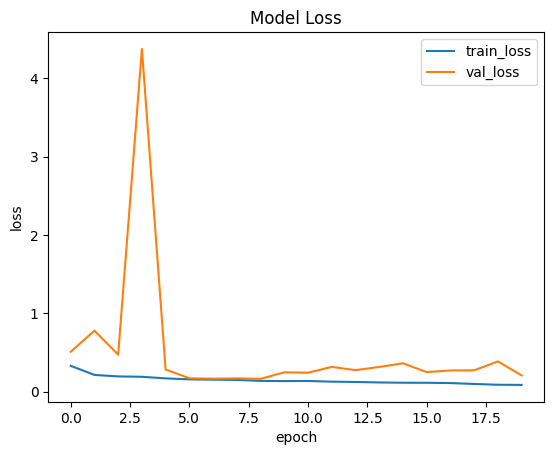

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

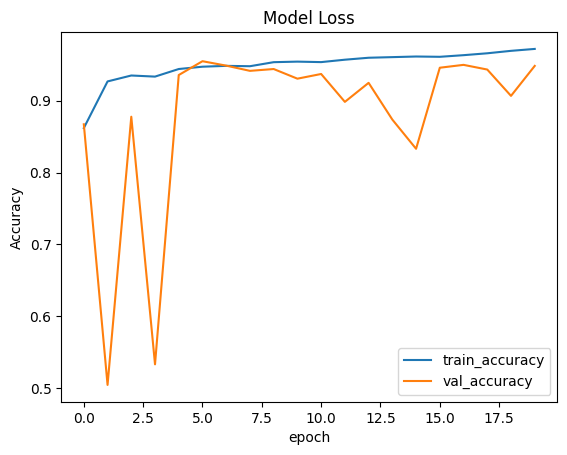

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show

In [21]:
test_dataset = test_dataset.batch(1)

In [22]:
def parasite_or_Not(x):
    if(x<0.5):
        return str('Par')
    else:
        return str('Uni')

In [23]:
Model2.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 13s 13s/step


0.58768785

In [24]:
parasite_or_Not(Model2.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 12s 12s/step


'Uni'

1/1 [==============================] - 0s 21ms/step


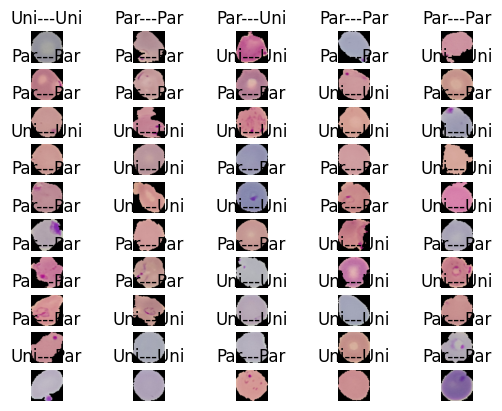

In [25]:
for i, (image, label) in enumerate (test_dataset.take(50)):

    ax = plt.subplot(10, 5, i+1)
    plt.imshow(image[0])
    plt.title(str(parasite_or_Not(label.numpy()[0])) + "---" + str(parasite_or_Not(Model2.predict(image)[0][0])))
    plt.axis('off')